<a   href="https://colab.research.google.com/github/N-Nieto/OHBM_SEA-SIG_Educational_Course/blob/master/03_pitfalls/03_07_imbalance_on_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For questions on this notebook contact: n.nieto@fz-juelich.de

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
from collections import Counter

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Create datasets with different imbalance ratios
ratios = [0.5, 0.7, 0.9, 0.95, 0.97, 0.99]
datasets = []

for ratio in ratios:
    X, y = make_classification(
        n_samples=10000,
        n_features=20,
        n_informative=10,
        n_redundant=5,
        weights=[ratio],
        flip_y=0.1,
        random_state=42,
    )
    datasets.append((X, y, ratio))
    print(f"Ratio {ratio}: Class distribution {Counter(y)}")

Ratio 0.5: Class distribution Counter({np.int64(0): 5021, np.int64(1): 4979})
Ratio 0.7: Class distribution Counter({np.int64(0): 6826, np.int64(1): 3174})
Ratio 0.9: Class distribution Counter({np.int64(0): 8629, np.int64(1): 1371})
Ratio 0.95: Class distribution Counter({np.int64(0): 9074, np.int64(1): 926})
Ratio 0.97: Class distribution Counter({np.int64(0): 9255, np.int64(1): 745})
Ratio 0.99: Class distribution Counter({np.int64(0): 9431, np.int64(1): 569})


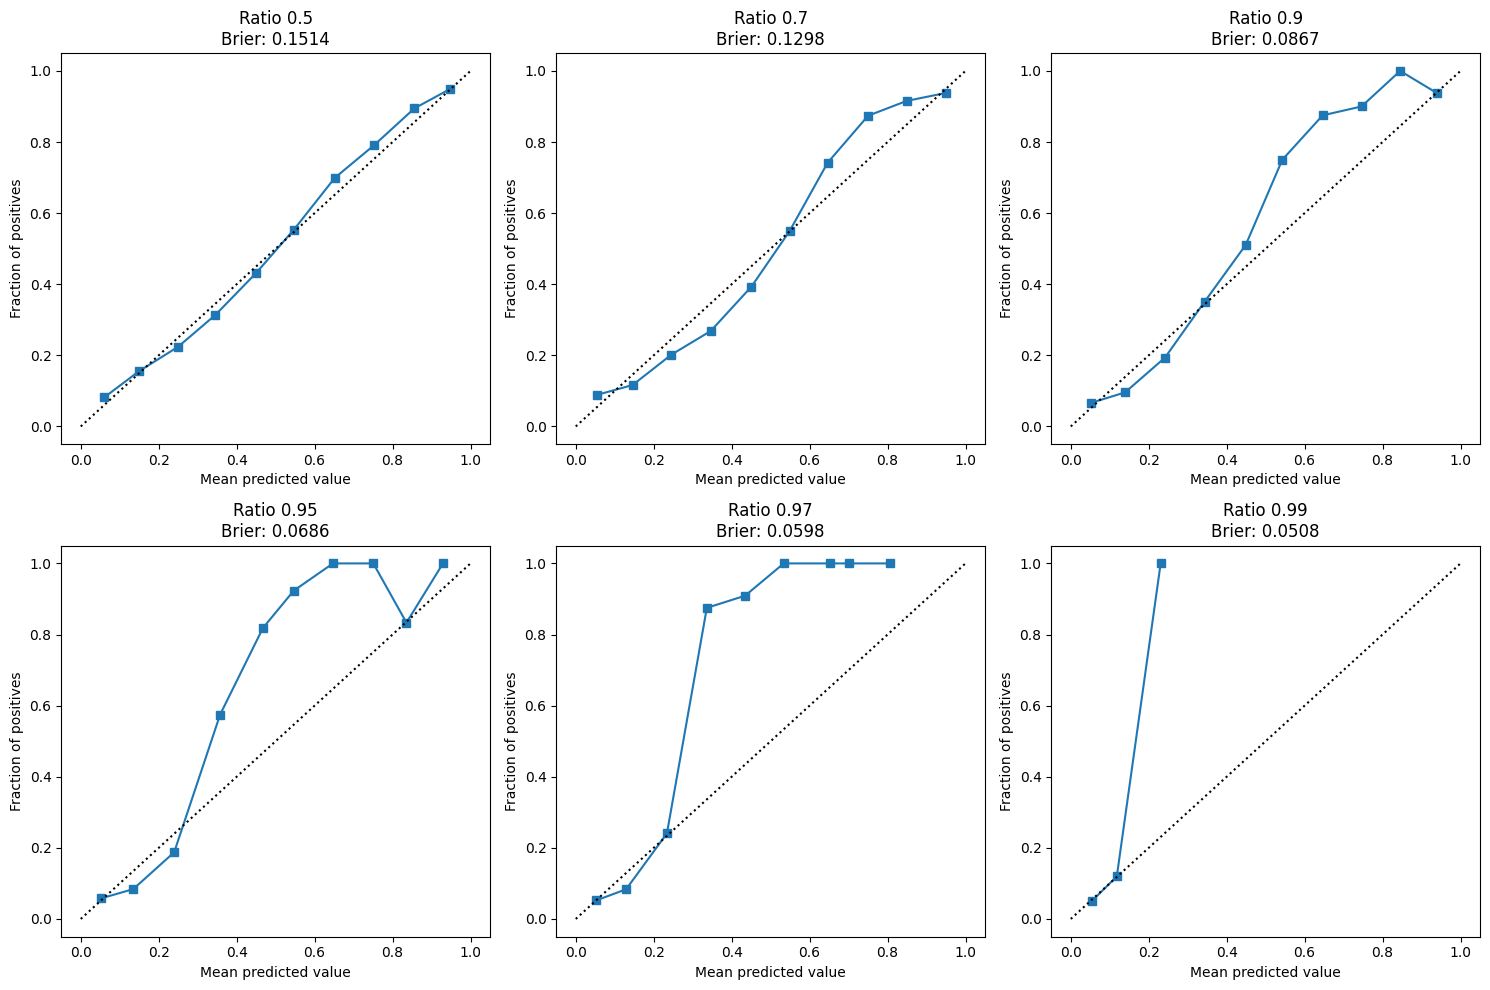

In [3]:
# Create separate reliability diagrams for each ratio
plt.figure(figsize=(15, 10))

for i, (X, y, ratio) in enumerate(datasets):
    plt.subplot(2, 3, i + 1)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    prob_pos = model.predict_proba(X_test)[:, 1]

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_test, prob_pos, n_bins=10
    )

    plt.plot(mean_predicted_value, fraction_of_positives, "s-")
    plt.plot([0, 1], [0, 1], "k:")
    plt.title(f"Ratio {ratio}\nBrier: {brier_score_loss(y_test, prob_pos):.4f}")
    plt.xlabel("Mean predicted value")
    plt.ylabel("Fraction of positives")

plt.tight_layout()
plt.show()